In [1]:
# Load packages
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import sklearn
from PIL import Image
from PIL import ImageOps

In [2]:
origFilePath = r"C:\Users\nickp\OneDrive\Desktop\Home Data Projects\Articles\tillieGraph\code.jpg"
origImg = Image.open(origFilePath)
#origImg.show()
origHt = origImg.height 
print(origHt)
iterationsPath = r"C:\Users\nickp\OneDrive\Desktop\Home Data Projects\Articles\tillieGraph\iterations"
imgExt = 'png'
finalGoal = 382
attempts = [131, 145, 21, 382]
fileLocations = []
attemptProgress = []
def progressImages():
    for idx, x in enumerate(attempts):
        tryPixels = origHt - x/finalGoal*origHt
        border = (0,tryPixels,0,0)
        progressImg = ImageOps.crop(origImg, border)
        width, height = progressImg.size
        progressImg = progressImg.resize((width//2,height//2))
        progressImg.save(iterationsPath + '\\' + str(idx) + '_' + str(x) + '.' + imgExt.lower(),imgExt.upper())
        fileLocation = iterationsPath + '\\' + str(idx) + '_' + str(x) + '.' + imgExt.lower()
        fileLocations.append(fileLocation)
        progress = x/finalGoal
        attemptProgress.append(progress)

progressImages()
fileLocations
#attemptProgress
# prove it works
# firstTryPct = origHt - 131/382*origHt
# print(firstTryPct)
# firstTryBorder = (0,firstTryPct,0,0)
# firstTryImg = ImageOps.crop(origImg, firstTryBorder)
# firstTryImg.show()

500


['C:\\Users\\nickp\\OneDrive\\Desktop\\Home Data Projects\\Articles\\tillieGraph\\iterations\\0_131.png',
 'C:\\Users\\nickp\\OneDrive\\Desktop\\Home Data Projects\\Articles\\tillieGraph\\iterations\\1_145.png',
 'C:\\Users\\nickp\\OneDrive\\Desktop\\Home Data Projects\\Articles\\tillieGraph\\iterations\\2_21.png',
 'C:\\Users\\nickp\\OneDrive\\Desktop\\Home Data Projects\\Articles\\tillieGraph\\iterations\\3_382.png']

In [3]:
df = pd.read_csv(r"C:\Users\nickp\OneDrive\Desktop\Home Data Projects\Articles\tillieGraph\data.csv")
df

,Attempt,Label,Time Unit
0,1,2014,1
1,1,2014,2
2,1,2014,3
3,1,2014,4
4,2,2016,1
5,2,2016,2
6,2,2016,3
7,2,2016,4
8,2,2016,5
9,3,2018,1


In [31]:
timeUnit = 'Wk'
df['xAxisTime'] = df['Label'].astype(str) + ' ' + timeUnit + ' ' + df['Time Unit'].astype(str).str.zfill(2)
df['xAxisInt'] = np.arange(len(df))
df['xAxisIntImg'] = df['Time Unit'].max() + 4
df['xAxisIntProgress'] = df['Time Unit'].max() + 1

df['seriesLabels'] =  'Attempt # ' + df['Attempt'].astype(str) + ' (' + df['Label'].astype(str) + ')'
df.head(10)

,Attempt,Label,Time Unit,xAxisTime,xAxisInt,xAxisIntImg,seriesLabels,xAxisIntProgress
0,1,2014,1,2014 Wk 01,0,16,Attempt # 1 (2014),13
1,1,2014,2,2014 Wk 02,1,16,Attempt # 1 (2014),13
2,1,2014,3,2014 Wk 03,2,16,Attempt # 1 (2014),13
3,1,2014,4,2014 Wk 04,3,16,Attempt # 1 (2014),13
4,2,2016,1,2016 Wk 01,4,16,Attempt # 2 (2016),13
5,2,2016,2,2016 Wk 02,5,16,Attempt # 2 (2016),13
6,2,2016,3,2016 Wk 03,6,16,Attempt # 2 (2016),13
7,2,2016,4,2016 Wk 04,7,16,Attempt # 2 (2016),13
8,2,2016,5,2016 Wk 05,8,16,Attempt # 2 (2016),13
9,3,2018,1,2018 Wk 01,9,16,Attempt # 3 (2018),13


In [33]:
lastPoint = df.sort_values(['Label', 'Time Unit']).groupby('Attempt').tail(1).reset_index(drop=True)
attemptProgress = pd.DataFrame(attemptProgress)
attemptProgress.columns =['Attempt Progress']
fileLocations = pd.DataFrame(fileLocations)
fileLocations.columns =['Img Location']
lastPoint = pd.concat([lastPoint,attemptProgress,fileLocations], axis=1)

lastPoint

,Attempt,Label,Time Unit,xAxisTime,xAxisInt,xAxisIntImg,seriesLabels,xAxisIntProgress,Attempt Progress,Img Location
0,1,2014,4,2014 Wk 04,3,16,Attempt # 1 (2014),13,0.342932,C:\Users\nickp\OneDrive\Desktop\Home Data Proj...
1,2,2016,5,2016 Wk 05,8,16,Attempt # 2 (2016),13,0.379581,C:\Users\nickp\OneDrive\Desktop\Home Data Proj...
2,3,2018,2,2018 Wk 02,10,16,Attempt # 3 (2018),13,0.054974,C:\Users\nickp\OneDrive\Desktop\Home Data Proj...
3,4,2023,12,2023 Wk 12,22,16,Attempt # 4 (2023),13,1.000000,C:\Users\nickp\OneDrive\Desktop\Home Data Proj...


In [34]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
   return OffsetImage(plt.imread(path, format="png"), zoom=1)

paths = lastPoint['Img Location'].to_list()
x = lastPoint['xAxisIntImg'].to_list()
y = lastPoint['Attempt'].to_list()

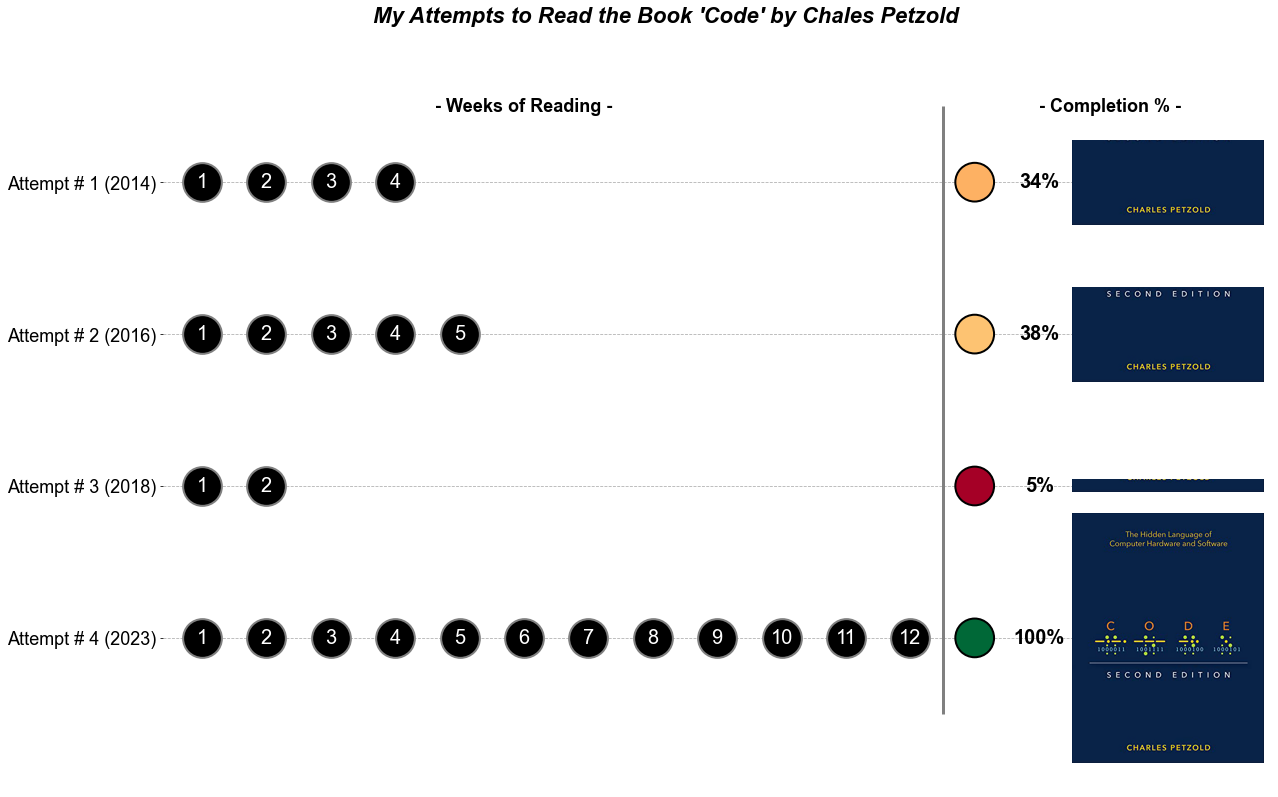

In [57]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
import statistics

plt.rcParams["figure.figsize"] = [18, 14]
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = 'Arial'

fig, ax = plt.subplots()
for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

plt.scatter(x="Time Unit", y="Attempt", data=df, s=1500, c='black', alpha=1, edgecolors='gray', linewidth=2)

plt.scatter(x="xAxisIntProgress", y="Attempt", data=lastPoint, s=1500, c="Attempt Progress", cmap='RdYlGn', alpha=1, edgecolors=(0,0,0,1), linewidth=2)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

xMax = lastPoint['xAxisIntImg'].max()
timeUnitMax = lastPoint['Time Unit'].max()
plt.xlim(None, xMax)
plt.xticks(rotation=90)
ax.get_xaxis().set_visible(False)

yMax = lastPoint['Attempt'].max()
#ax.set_ylabel('Attempt #', fontsize=24)
yInt = lastPoint['Attempt'].to_list()
ax.yaxis.set_label_coords(-.05,.5)
plt.ylim(-.01, yMax+1)
plt.yticks(yInt)
ax.set_yticklabels(lastPoint['seriesLabels'],size=18)
ax.set_axisbelow(True)
ax.yaxis.grid(True, which='major', linestyle='dashed')

#plt.axis('off') 

for index, row in df.iterrows():
    plt.text(row['Time Unit'],row['Attempt'],row['Time Unit'],horizontalalignment='center',verticalalignment='center',fontsize=20, c='white')

for index, row in lastPoint.iterrows():
    plt.text(row['xAxisIntProgress']+1,row['Attempt'],'{:.0f}%'.format(row['Attempt Progress']*100)
             ,horizontalalignment='center',verticalalignment='center',fontsize=20, c='black',weight='bold')
    
# for index, row in lastPoint.iterrows():
#     plt.text(row['xAxisIntImg']-row['Time Unit']-2.7,row['Attempt']+.3,row['seriesLabels']
#              ,horizontalalignment='left',verticalalignment='center',fontsize=20, c='black')
    
plt.title(label="My Attempts to Read the Book 'Code' by Chales Petzold",
         loc="center",
         fontsize=22,
         fontstyle="italic",
         weight="bold")

plt.gca().invert_yaxis()
plt.vlines(x = timeUnitMax + .5, ymin=yMax+.5,ymax=.5, linewidth=3,colors='gray')

plt.text(s='- Weeks of Reading -',x=timeUnitMax/2,y=.5,horizontalalignment='center',verticalalignment='center',fontsize=18, c='black',weight='bold')
plt.text(s='- Completion % -',x=xMax-(xMax-timeUnitMax)/2,y=.5,horizontalalignment='left',verticalalignment='center',fontsize=18, c='black',weight='bold')
plt.savefig('tillieOutput.png')
plt.show()